In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/tmdb_5000_credits.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Identify missing values
print(movies.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [ ]:
# Remove duplicate entries
movies = movies.drop_duplicates()
print(movies.duplicated()) #print if it has any duplicated value

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4803, dtype: bool


In [ ]:
# Convert release_date to datetime objects
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
# Check if the conversion was successful
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

# EDA

In [ ]:
genre_list = []
import ast
for index, row in movies.iterrows():
  genres = ast.literal_eval(row['genres'])
  genre_names = [genre['name'] for genre in genres]
  genre_list.append(genre_names)

movies['genre_list'] = genre_list

# Create a new DataFrame where each row represents a single movie genre
genre_df = movies.explode('genre_list')

# Analyze the distribution of genres
genre_counts = genre_df['genre_list'].value_counts()

# Print the genre counts
print(genre_counts)

genre_list
Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64


In [ ]:
# Sort movies by revenue in descending order and get the top 10
top_10_movies = movies.sort_values('revenue', ascending=False).head(10)

# Print the top 10 highest-grossing movies
print(top_10_movies[['title', 'revenue']])

                          title     revenue
0                        Avatar  2787965087
25                      Titanic  1845034188
16                 The Avengers  1519557910
28               Jurassic World  1513528810
44                    Furious 7  1506249360
7       Avengers: Age of Ultron  1405403694
124                      Frozen  1274219009
31                   Iron Man 3  1215439994
546                     Minions  1156730962
26   Captain America: Civil War  1153304495


In [ ]:
# Calculate the correlation between budget and revenue
correlation = movies['budget'].corr(movies['revenue'])

print(f"The correlation between movie budget and revenue is: {correlation}")

# Analyze the relationship using descriptive statistics
print(movies[['budget', 'revenue']].describe())

The correlation between movie budget and revenue is: 0.730822856924462
             budget       revenue
count  4.803000e+03  4.803000e+03
mean   2.904504e+07  8.226064e+07
std    4.072239e+07  1.628571e+08
min    0.000000e+00  0.000000e+00
25%    7.900000e+05  0.000000e+00
50%    1.500000e+07  1.917000e+07
75%    4.000000e+07  9.291719e+07
max    3.800000e+08  2.787965e+09


In [ ]:
# Extract the year from the release_date
movies['release_year'] = movies['release_date'].dt.year

# Group movies by release year and count the number of movies in each year
movie_counts_by_year = movies.groupby('release_year')['title'].count()

# Print the movie counts for each year
print(movie_counts_by_year)

# You can also analyze specific periods or decades if you're interested in specific trends.
# For example, to see the trend in the 2000s:
movies_2000s = movies[(movies['release_year'] >= 2000) & (movies['release_year'] <= 2009)]
movie_counts_2000s = movies_2000s.groupby('release_year')['title'].count()
print("\nMovie counts in the 2000s:")
movie_counts_2000s

release_year
1916.0      1
1925.0      1
1927.0      1
1929.0      2
1930.0      1
         ... 
2013.0    231
2014.0    238
2015.0    216
2016.0    104
2017.0      1
Name: title, Length: 90, dtype: int64

Movie counts in the 2000s:


,title
release_year,
2000.0,166
2001.0,183
2002.0,203
2003.0,169
2004.0,204
2005.0,217
2006.0,237
2007.0,195
2008.0,227


# Data Visualization

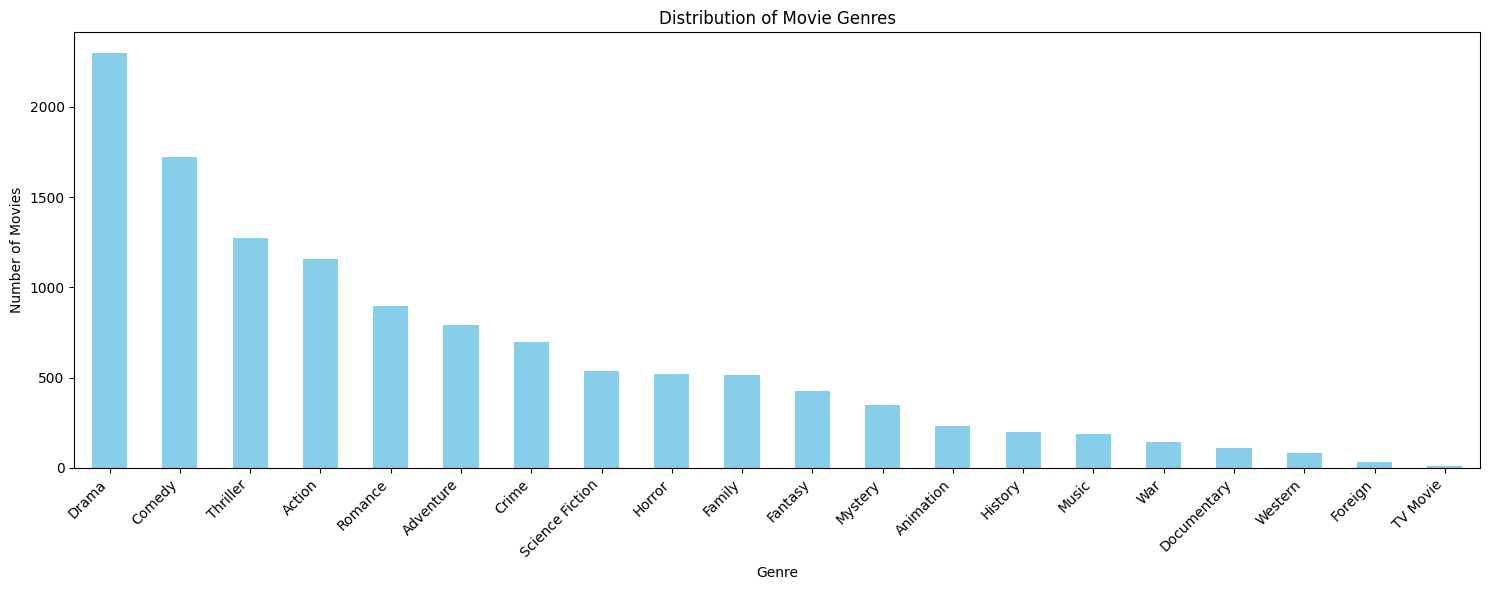

In [ ]:
#Bar charts for genre distribution
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for better readability
plt.show()

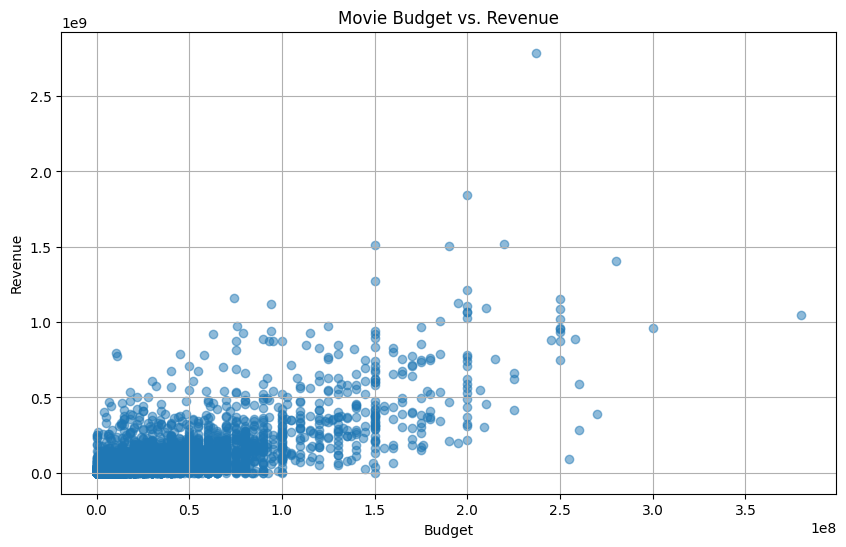

In [ ]:
# Scatter plot for budget vs. revenue
plt.figure(figsize=(10, 6))
plt.scatter(movies['budget'], movies['revenue'], alpha=0.5)  # Adjust alpha for transparency
plt.title('Movie Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)  # Add grid for better readability
plt.show()

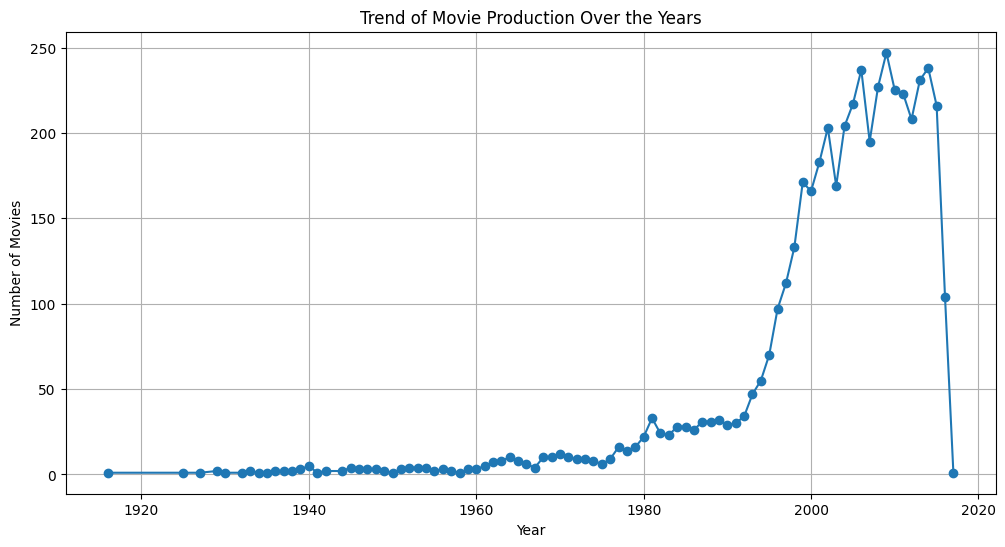

In [ ]:
# Line graph for movie production trends over time
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Trend of Movie Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()
